<a href="https://colab.research.google.com/github/alyaa21/Apple-Detection/blob/master/classification_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt 
from glob import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/fruits-360/Training"
test_path = "/content/drive/MyDrive/fruits-360/Test"

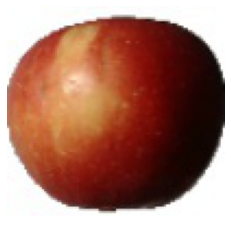

In [ ]:
img = load_img(train_path + "/Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [ ]:
className = glob(train_path + "/*")
numberOfClass = len(className)
print("NumberOfClass: ", numberOfClass)

NumberOfClass:  131


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())


In [ ]:
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

In [ ]:
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

In [ ]:
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) #output
model.add(Activation("softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [ ]:
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    horizontal_flip=True,
                                    zoom_range=0.3)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")


Found 67720 images belonging to 131 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(test_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")


Found 22688 images belonging to 131 classes.


In [ ]:
hist = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 100,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
50/50 [==============================] - 395s 8s/step - loss: 4.1014 - accuracy: 0.0856 - val_loss: 3.5141 - val_accuracy: 0.1100
Epoch 2/100
50/50 [==============================] - 519s 10s/step - loss: 3.2887 - accuracy: 0.1744 - val_loss: 2.5859 - val_accuracy: 0.3512
Epoch 3/100
50/50 [==============================] - 501s 10s/step - loss: 2.7269 - accuracy: 0.2614 - val_loss: 1.9819 - val_accuracy: 0.4512
Epoch 4/100
50/50 [==============================] - 490s 10s/step - loss: 2.2763 - accuracy: 0.3469 - val_loss: 1.4704 - val_accuracy: 0.6187
Epoch 5/100
50/50 [==============================] - 506s 10s/step - loss: 2.0372 - accuracy: 0.4025 - val_loss: 1.2763 - val_accuracy: 0.6675
Epoch 6/100
50/50 [==============================] - 500s 10s/step - loss: 1.6307 - accuracy: 0.5025 - val_loss: 0.9359 - val_accuracy: 0.7487
Epoch 7/100
50/50 [==============================] - 428s 9s/step - loss: 1.4871 - accuracy: 0.5494 - val_loss: 0.9184 - val_accuracy: 0.7375
E

In [ ]:
model.save_weights("deneme.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


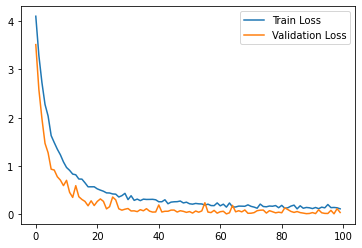

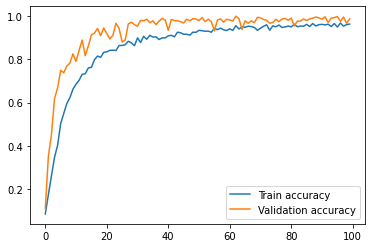

In [ ]:
#Model Evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.show()

In [ ]:
import json

with open("deneme.json","w") as f:
    json.dump(hist.history, f)

In [ ]:
import codecs

with codecs.open("deneme.json","r",encoding="utf-8") as f:
    h = json.loads(f.read())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


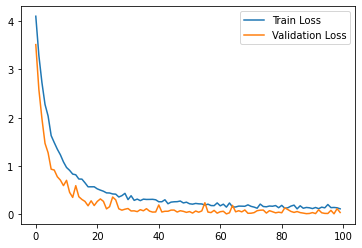

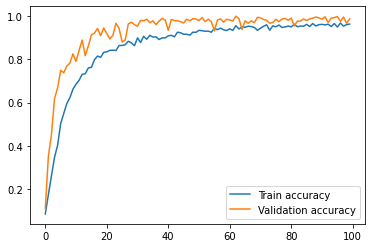

In [ ]:
print(hist.history.keys())
plt.plot(h["loss"],label = "Train Loss")
plt.plot(h["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label = "Train accuracy")
plt.plot(h["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.show()